## Quiz #0503

### "Data Augmentation"

#### Answer the following questions by providing Python code:
#### Objectives:
- Code the helper functions.
- Optimize and test a predictive model of your choice.
- Carry out data aumentation in order to improve the predictive accuracy when the given training data is small.

In [1]:
import numpy as np
import pandas as pd
import os
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn import metrics, preprocessing
from scipy.ndimage.interpolation import rotate
warnings.filterwarnings(action='ignore')                  # Turn off the warnings.
%matplotlib inline

#### Read in data:
The explanation on the original data can be found [here](http://yann.lecun.com/exdb/mnist/).

- The data we will be using is a small subset of the original data with only 100 observations.
- Each observation is the "flattened" version of a image.
- The first column corresponds to the label (Y).
- The image size is 28x28.

In [3]:
# Read the training and testing data separately.
data_train = pd.read_csv('data_mnist_train_100.csv', header=None,encoding='latin1')
data_test = pd.read_csv('data_mnist_test_100.csv', header=None,encoding='latin1')

# Scale and split the data set into X and Y.
X_train = np.array((data_train.iloc[:,1:]/255.0)*0.99+0.01)
X_test = np.array((data_test.iloc[:,1:]/255.0)*0.99+0.01)
Y_train = np.array(data_train.iloc[:,0])
Y_test = np.array(data_test.iloc[:,0])

1). The helper function 'show_data()' visualizes each given observation.

In [4]:
def show_data(X, Y, n, angle=0):
    image_matrix = X[n,:].reshape((28,28))
    image_matrix = rotate(image_matrix, angle, cval=0.01, reshape=False)
    imax = image_matrix.max()
    imin = image_matrix.min()
    image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
    plt.imshow(image_matrix, cmap='Greys',interpolation='None')
    print(Y[n])

3


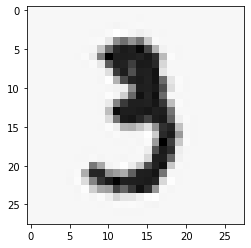

In [168]:
# Example 1.
show_data(X_train, Y_train,10,10)

3


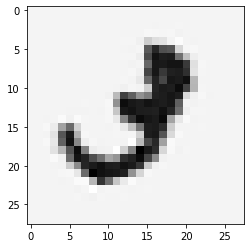

In [6]:
# Example 2.
show_data(X_train, Y_train,10,-30)

1


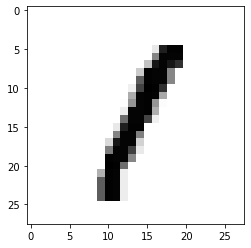

In [7]:
# Example 3.
show_data(X_train, Y_train,77,0)

2). Choose an algorithm and carry out the predictive analysis.

- Optimize the hyperparameter(s).
- Calculate the accuracy.
- Is the accuracy high enough?

In [24]:
       # <Your code goes in here>
import tensorflow as tf

# Define model
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit model
model.fit(X_train, Y_train, epochs=20)

test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20
4/4 [==============================] - 0s 7ms/step - loss: 2.1722 - accuracy: 0.2700
Epoch 2/20
4/4 [==============================] - 0s 7ms/step - loss: 1.3349 - accuracy: 0.8000
Epoch 3/20
4/4 [==============================] - 0s 6ms/step - loss: 0.8909 - accuracy: 0.9100
Epoch 4/20
4/4 [==============================] - 0s 7ms/step - loss: 0.5980 - accuracy: 0.9800
Epoch 5/20
4/4 [==============================] - 0s 10ms/step - loss: 0.3918 - accuracy: 0.9900
Epoch 6/20
4/4 [==============================] - 0s 7ms/step - loss: 0.2564 - accuracy: 0.9900
Epoch 7/20
4/4 [==============================] - 0s 10ms/step - loss: 0.1828 - accuracy: 1.0000
Epoch 8/20
4/4 [==============================] - 0s 7ms/step - loss: 0.1306 - accuracy: 1.0000
Epoch 9/20
4/4 [==============================] - 0s 8ms/step - loss: 0.0916 - accuracy: 1.0000
Epoch 10/20
4/4 [==============================] - 0s 7ms/step - loss: 0.0689 - accuracy: 1.0000
Epoch 11/20
4/4 [====================

the accuracy is 0.7 which is not enough 

3). Code the helper function 'rotate_data()' that rotates each given observation by an angle. HINT: use scipy.ndimage.interpolation().

In [205]:
       # <Your code goes in here>
def rotate_data(X , angle):
  img = X.reshape((28,28))
  img_rotate = rotate(img, angle, reshape=False)
  return img_rotate.reshape([-1])


4). Augment the training dataset.
- Increase the size of the training dataset by introducing slight rotations (clockwise and counterclockwise).
- Use the 'rotate_data()' function defined in the previous step.
- No need to augment the testing dataset.
- Target approximately five fold aumentation.

0


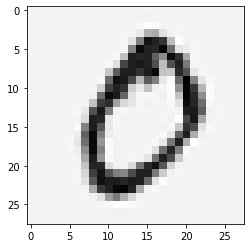

In [194]:
image_matrix = X_train[1,:].reshape((28,28))
image_matrix = rotate(image_matrix, 10, cval=0.01, reshape=False)
imax = image_matrix.max()
imin = image_matrix.min()
image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
plt.imshow(image_matrix, cmap='Greys',interpolation='None')
print(Y_train[1])

0


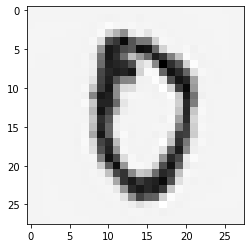

In [206]:
z=rotate_data(X_train[1,:],30)
image_matrix = z.reshape((28,28))
image_matrix = rotate(image_matrix, 10, cval=0.01, reshape=False)
imax = image_matrix.max()
imin = image_matrix.min()
image_matrix = ((image_matrix-imin)/(imax-imin))*0.99+0.01
plt.imshow(image_matrix, cmap='Greys',interpolation='None')
print(Y_train[1])

In [208]:
z.shape

(784,)

In [223]:
X_train_augmented = [image for image in X_train]
Y_train_augmented = [image for image in Y_train]


for image, label in zip(X_train, Y_train):
  X_train_augmented.append(rotate_data(image,15))
  X_train_augmented.append(rotate_data(image,-15))
  Y_train_augmented.append(label)
  Y_train_augmented.append(label)
X_train_augmented = np.array(X_train_augmented)
Y_train_augmented = np.array(Y_train_augmented)

In [225]:
Y_train_augmented.shape

(300,)

5). Redo the predictive analysis with the augmented training dataset.

- Use the same algorithm as in the step 2).
- Calculate the accuracy.
- Has the accuracy gone up?

In [226]:
       # <Your code goes in here>
model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=(784,)),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(10)
])

# Compile Model
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Fit model

model.fit(X_train_augmented, Y_train_augmented, epochs=20)

test_loss, test_acc = model.evaluate(X_test,Y_test, verbose=2)

print('\nTest accuracy:', test_acc)

Epoch 1/20
10/10 [==============================] - 0s 5ms/step - loss: 1.8377 - accuracy: 0.4033
Epoch 2/20
10/10 [==============================] - 0s 5ms/step - loss: 0.8178 - accuracy: 0.8433
Epoch 3/20
10/10 [==============================] - 0s 5ms/step - loss: 0.4495 - accuracy: 0.9367
Epoch 4/20
10/10 [==============================] - 0s 5ms/step - loss: 0.2635 - accuracy: 0.9667
Epoch 5/20
10/10 [==============================] - 0s 5ms/step - loss: 0.1523 - accuracy: 0.9967
Epoch 6/20
10/10 [==============================] - 0s 5ms/step - loss: 0.1001 - accuracy: 0.9967
Epoch 7/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0685 - accuracy: 1.0000
Epoch 8/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0503 - accuracy: 1.0000
Epoch 9/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0382 - accuracy: 1.0000
Epoch 10/20
10/10 [==============================] - 0s 5ms/step - loss: 0.0312 - accuracy: 1.0000
Epoch 11/20
10/10 [

In [ ]:
yep ! the accuracy has gone up 